# Basemap 地理数据可视化

> [Basemap 官方文档](https://pandas.pydata.org/)  


In [1]:
%matplotlib inline
import numpy as np # 科学计算
import matplotlib.pyplot as plt # 可视化
from mpl_toolkits.basemap import Basemap # 地理可视化

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


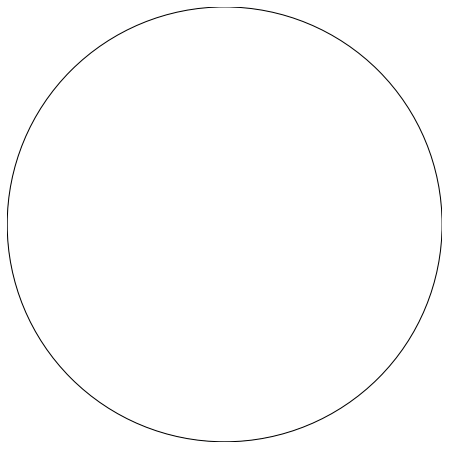

In [5]:
plt.figure(figsize=(8, 8))
m = Basemap(projection="ortho", resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


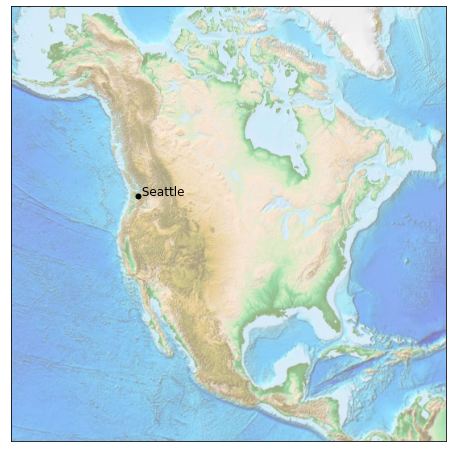

In [7]:
## 在地图上添加标签
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6,
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# 地图上的(经度, 纬度)对应图上的(x, y)坐标
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

## 地图投影

In [9]:
from itertools import chain

def draw_map(m, scale=0.2):
    # 画地貌晕渲图
    m.shadedrelief(scale=scale)
    
    # 用字典表示经纬度
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))
    
    # 字典的键是plt.Line2D示例
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # 用循环将所有线设置成需要的样式
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

### 圆柱投影（cylindrical projection）

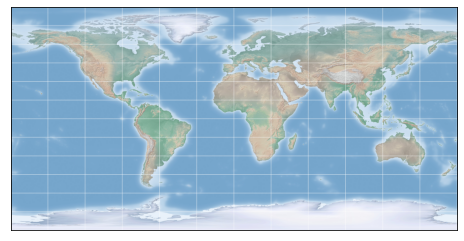

In [12]:
## 圆柱等积投影
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

### 伪圆柱投影（pseudo-cylindrical projection）

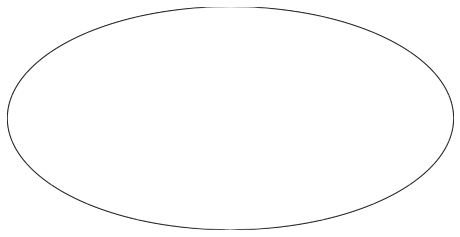

In [13]:
## 摩尔威德投影
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)
draw_map(m)

### 透视投影（perspective projection）

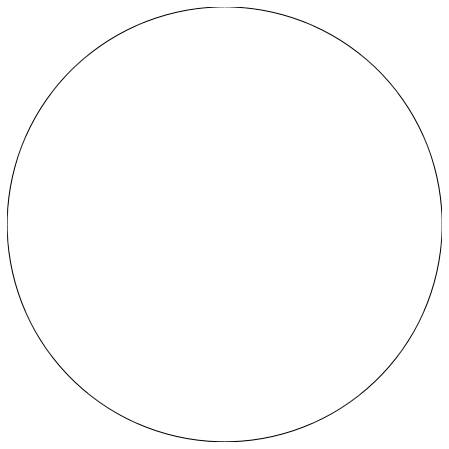

In [13]:
## 正射投影
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None,
            lat_0=50, lon_0=0)
draw_map(m);

### 圆锥投影（conic projection）

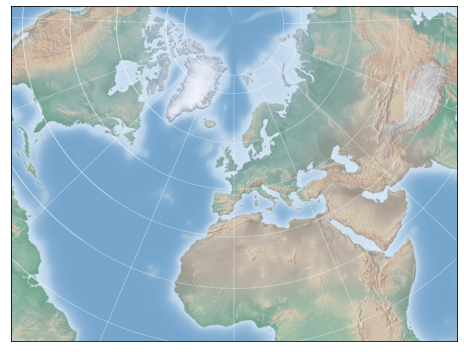

In [15]:
## 阿尔伯斯等积圆锥投影
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            lon_0=0, lat_0=50, lat_1=45, lat_2=55,
            width=1.6E7, height=1.2E7)
draw_map(m)

如果你还需要做更多的地图可视化，那么我推荐你学习其他投影类型的知识，掌握它们的属性、优点和不足。可以在[Basemap 帮助文档](http://matplotlib.org/basemap/users/mapsetup.html)里找到它们。  

## 地图背景
- 物理边界与水体
    - drawcoastlines()：绘制大陆海岸线
    - drawlsmask()：为陆地与海洋设置填充色，从而可以在陆地或海洋投影其他图像
    - drawmapboundary()：绘制地图边界，包括为海洋填充颜色
    - drawrivers()：绘制河流
    - fillcontinents()：用一种颜色填充大陆，用另一种颜色填充湖泊（可选）
- 政治边界
    - drawcountries()：绘制国界线
    - drawstates()：绘制美国州界线
    - drawcounties()：绘制美国县界线
- 地图功能
    - drawgreatcircle()：在两点之间绘制一个大圆
    - drawparallels()：绘制纬线
    - drawmeridians()：绘制经线
    - drawmapscale()：在地图上绘制一个线性比例尺
- 地球影像
    - bluemarble()：绘制NASA 蓝色弹珠地球投影
    - shadedrelief()：在地图上绘制地貌晕渲图
    - etopo()：在地图上绘制地形晕渲图
    - warpimage()：将用户提供的图像投影到地图上

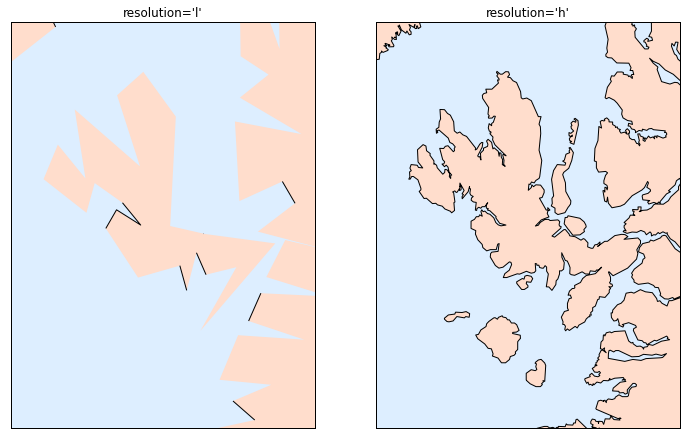

In [16]:
## 高、低分辨率地图效果对比
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
for i, res in enumerate(['l', 'h']):
    m = Basemap(projection='gnom', lat_0=57.3, lon_0=-6.2,
                width=90000, height=120000, resolution=res, ax=ax[i])
    m.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF')
    m.drawmapboundary(fill_color="#DDEEFF")
    m.drawcoastlines()
    ax[i].set_title("resolution='{0}'".format(res));

## 地图数据标记

- contour() / contourf()：绘制等高线/ 填充等高线
- imshow()：绘制一个图像
- pcolor() / pcolormesh()：绘制带规则/ 不规则网格的伪彩图（pseudocolor plot）
- plot()：绘制线条和/ 或标签
- scatter()：绘制带标签的点
- quiver()：绘制箭头
- barbs()：绘制风羽（wind barb）
- drawgreatcircle()：绘制大圆圈

## 案例：美国加州城市数据

In [ ]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')

# 提取需要的数据
lat = cities['latd'].values
lon = cities['longd'].values
population = cities['population_total'].values
area = cities['area_total_km2'].values

In [ ]:
# 1. 绘制地图背景
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h',
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. 绘制城市数据散点，用颜色表示人口数据
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=area,
          cmap='Reds', alpha=0.5)

# 3. 创建颜色条与图例
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# 用虚拟点绘制图例
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

## 案例：地表温度数据